# 1. Lag Features

1. `pandas.DataFrame.shift(periods=1, freq=None, axis=0, fill_value=<no_default>, suffix=None)`: Shifts index by desired number of periods with an optional time `freq`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load retail sales dataset 
df = pd.read_csv(
    "datasets/example_retail_sales.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)
df.head()

,y
ds,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068


Text(0.5, 0, 'Time')

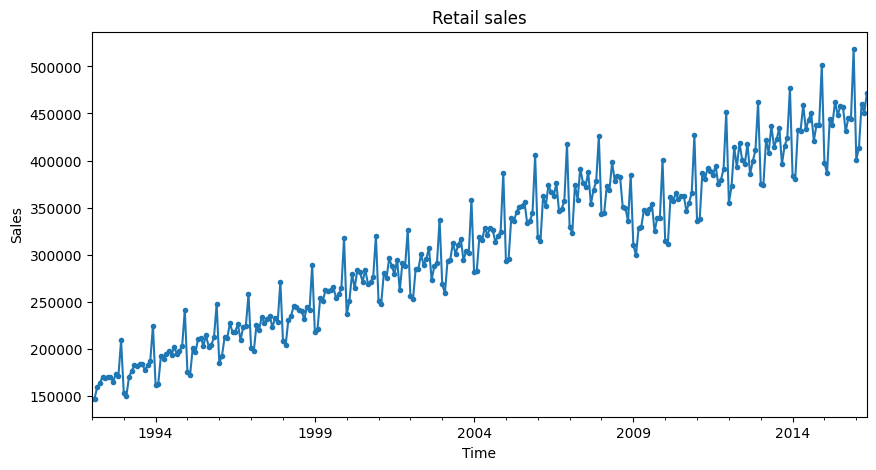

In [3]:
fig, ax = plt.subplots(figsize=[10, 5])
ax = df.plot(y="y", marker=".", figsize=[10, 5], legend=None, ax=ax)
ax.set_title('Retail sales')
ax.set_ylabel('Sales')
ax.set_xlabel('Time')

In [4]:
df_ = df.copy()  # Create a copy to preserve the original dataframe
                 # for later use.

lag = 2  # As the time series is uniformly spaced by months we can
         # specify the lag in terms of the number of periods. In
         # this case the period is in unit of months.

df_[f"y_lag_{lag}"] = df_["y"].shift(periods=lag)
df_.head()

,y,y_lag_2
ds,,
1992-01-01,146376,NaN
1992-02-01,147079,NaN
1992-03-01,159336,146376.0
1992-04-01,163669,147079.0
1992-05-01,170068,159336.0


In [5]:
df_ = df.copy()  # Create a copy to preserve the original dataframe
                 # for later use

lag = 2  # As the time series is uniformly spaced by months we can
         # specify the lag in terms of the number of periods. In
         # this case the period is in unit of months.

df_[f"y_lag_{lag}"] = df_["y"].shift(periods=lag, freq="MS")
df_.head()

,y,y_lag_2
ds,,
1992-01-01,146376,NaN
1992-02-01,147079,NaN
1992-03-01,159336,146376.0
1992-04-01,163669,147079.0
1992-05-01,170068,159336.0


In [6]:
df_ = df.copy()  # Create a copy to preserve the original dataframe for later use

freq = "2MS"
df_[f"y_lag_{freq}"] = df_["y"].shift(freq=freq)
df_.head()

,y,y_lag_2MS
ds,,
1992-01-01,146376,NaN
1992-02-01,147079,NaN
1992-03-01,159336,146376.0
1992-04-01,163669,147079.0
1992-05-01,170068,159336.0


## 1-1. Lag Plots

In [7]:
import numpy as np
import seaborn as sns

In [8]:
num_timesteps = 300  # Length of time series we want.
np.random.seed(0)  # Ensures we generate the same random numbers every time.

y = np.random.normal(loc=0, scale=1, size=num_timesteps)
ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

df = pd.DataFrame(data={"y": y}, index=ts)
df.head()

,y
2000-01-01,1.764052
2000-01-02,0.400157
2000-01-03,0.978738
2000-01-04,2.240893
2000-01-05,1.867558


Text(0.5, 0, 'Time')

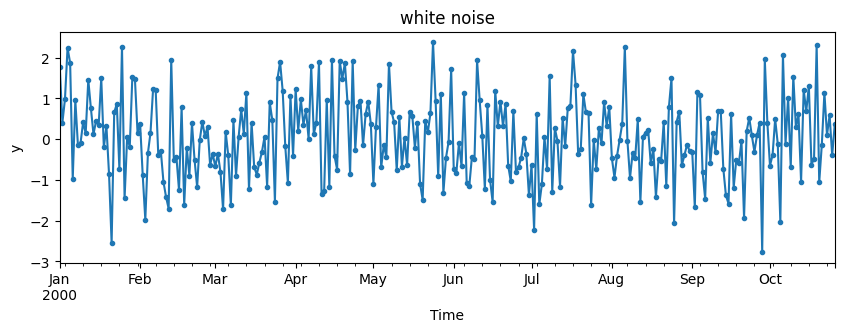

In [9]:
ax = df.plot(figsize=[10, 3], legend=None, marker=".")
ax.set_title("white noise")
ax.set_ylabel("y")
ax.set_xlabel("Time")

Text(0.5, 1.0, 'Lag plot with lag 1')

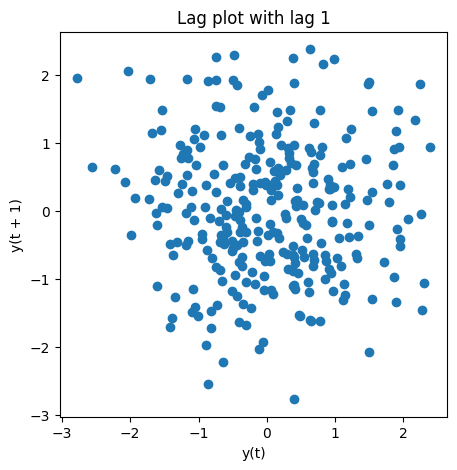

In [10]:
fig, ax = plt.subplots(figsize=[5, 5])
ax = pd.plotting.lag_plot(df["y"], lag=1, ax=ax)
ax.set_title("Lag plot with lag 1")

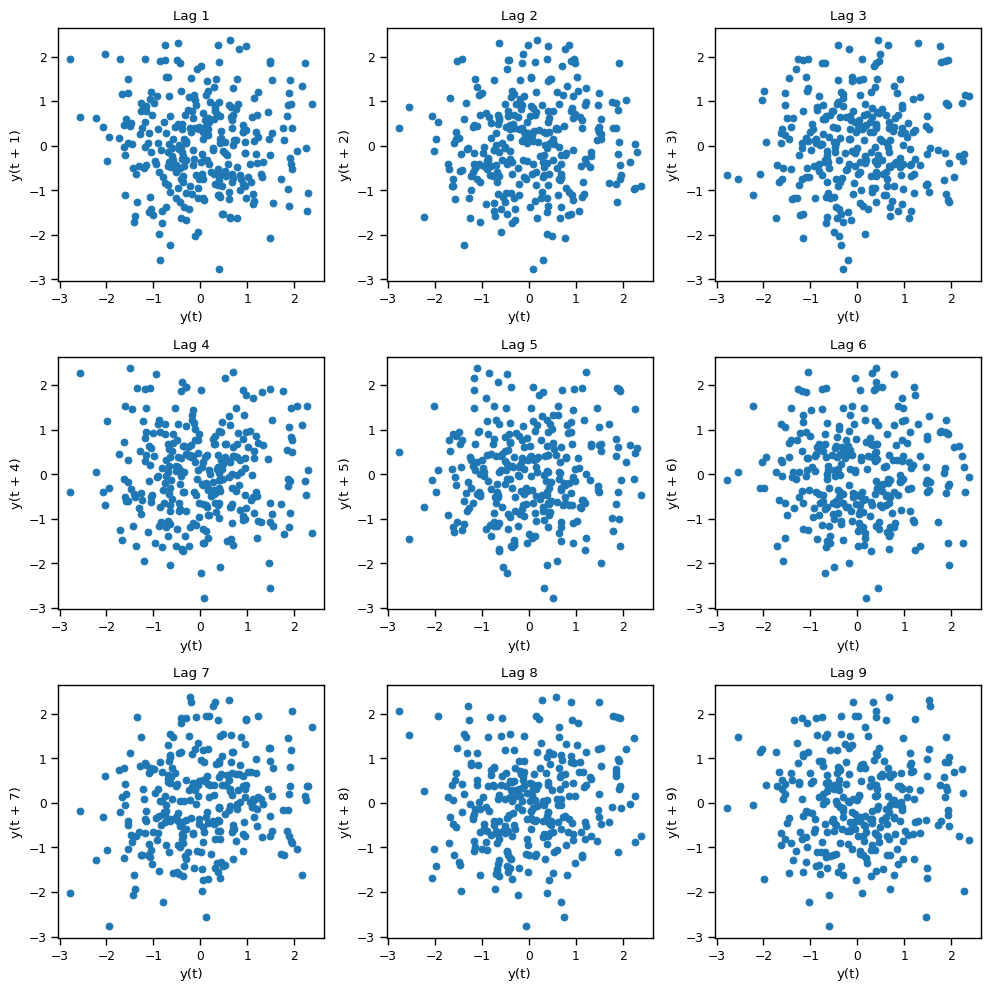

In [11]:
with sns.plotting_context("paper"): # Sets the plotting format for these specific plots.
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=[10, 10])
    for i, ax_ in enumerate(ax.flatten()):
        pd.plotting.lag_plot(df["y"], lag=i + 1, ax=ax_)
        ax_.set_title(f"Lag {i+1}")
        ax_.ticklabel_format(style="sci", scilimits=(0, 0))
    plt.tight_layout()

Text(0.5, 0, 'Time')

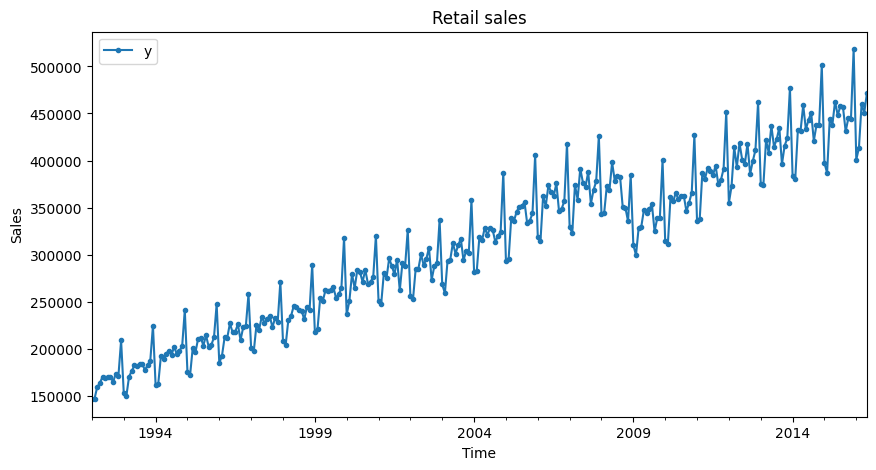

In [12]:
# Load retail sales dataset
df = pd.read_csv(
    "datasets/example_retail_sales.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)

# Plot the time series
ax = df.plot(y="y", marker=".", figsize=[10, 5])
ax.set_title('Retail sales')
ax.set_ylabel('Sales')
ax.set_xlabel('Time')

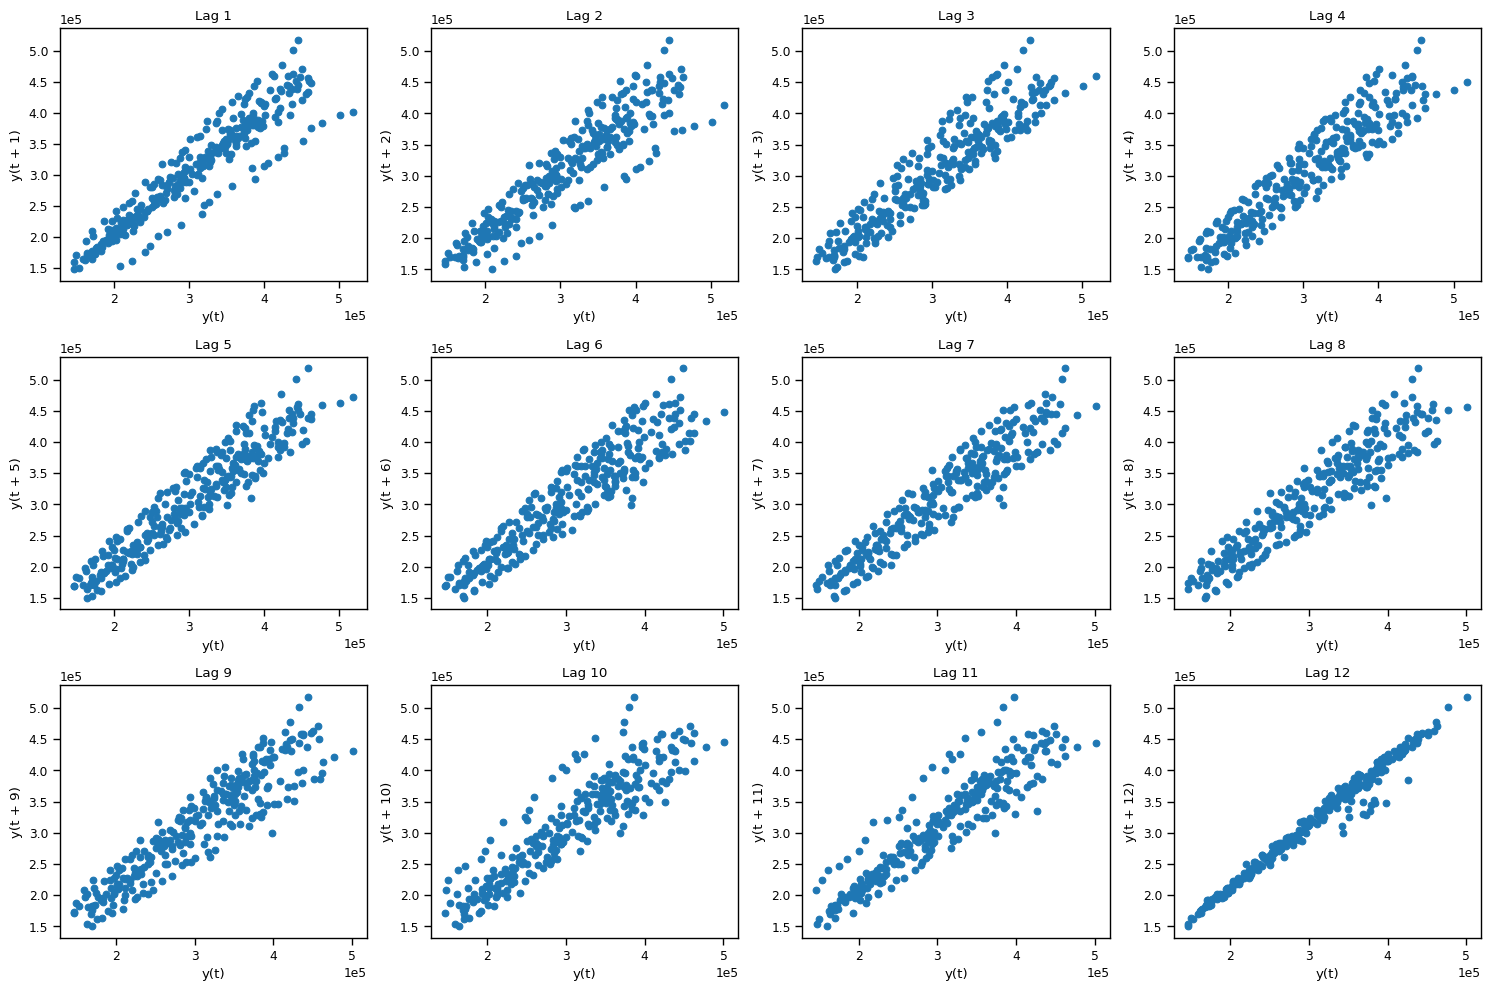

In [13]:
with sns.plotting_context("paper"):
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=[15, 10])
    for i, ax_ in enumerate(ax.flatten()):
        pd.plotting.lag_plot(df["y"], lag=i + 1, ax=ax_)
        ax_.set_title(f"Lag {i+1}")
        ax_.ticklabel_format(style="sci", scilimits=(0, 0))
    plt.tight_layout()

Text(0.5, 0, 'Time')

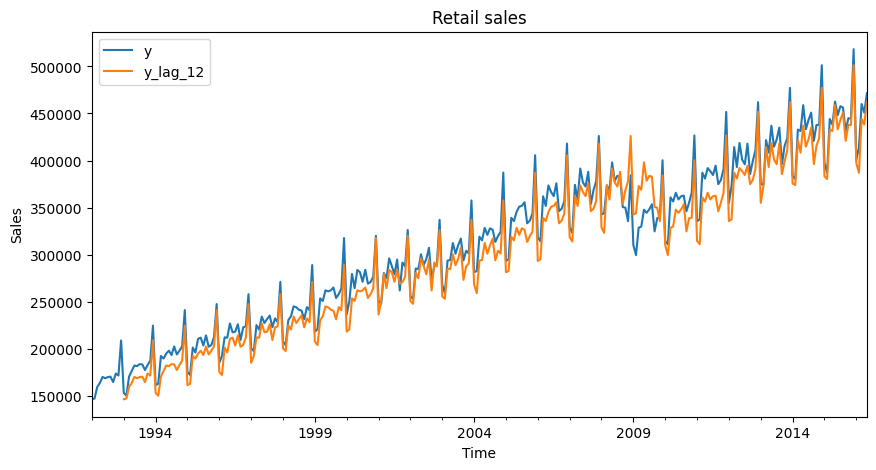

In [14]:
# Compute the lag
df["y_lag_12"] = df["y"].shift(periods=12)

# Plot the sales and the lag 100 sales
ax = df.plot(y=["y", "y_lag_12"], figsize=[10, 5])

ax.set_title('Retail sales')
ax.set_ylabel('Sales')
ax.set_xlabel('Time')

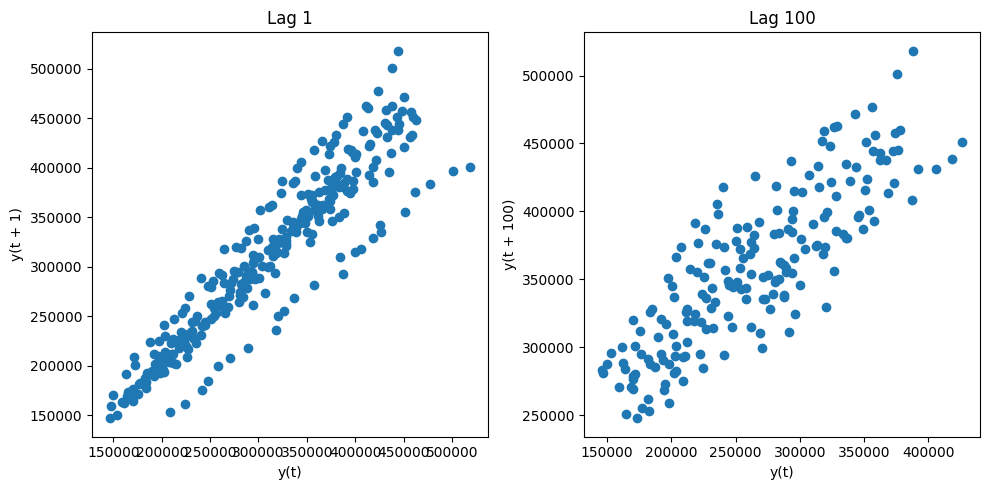

In [15]:
# Plot lag=1 vs lag=100
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10, 5])
pd.plotting.lag_plot(df["y"], lag=1, ax=ax[0])
ax[0].set_title(f"Lag 1")
pd.plotting.lag_plot(df["y"], lag=100, ax=ax[1])
ax[1].set_title(f"Lag 100")

plt.tight_layout()

<Axes: xlabel='ds'>

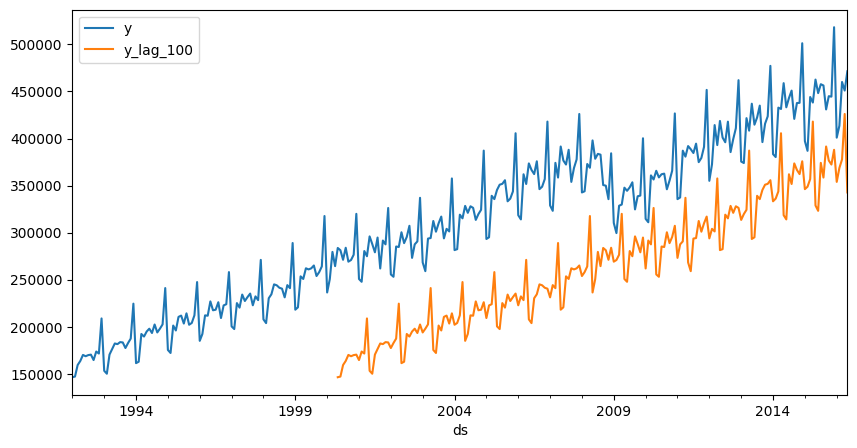

In [16]:
# Compute the lag
df["y_lag_100"] = df["y"].shift(periods=100)

# Plot the sales and the lag 100 sales
df.plot(y=["y", "y_lag_100"], figsize=[10, 5])

# 2. Window Features
## 2-1. Rolling Window Features

In [17]:
data = pd.read_csv(
    "datasets/victoria_electricity_demand.csv",
    usecols=["demand", "temperature", "date_time"],
    index_col=["date_time"],
    parse_dates=["date_time"],
)
data.head()

,demand,temperature
date_time,,
2002-01-01 00:00:00,6919.366092,32.6
2002-01-01 01:00:00,7165.974188,32.6
2002-01-01 02:00:00,6406.542994,32.6
2002-01-01 03:00:00,5815.537828,32.6
2002-01-01 04:00:00,5497.732922,32.6


In [18]:
# For this demo we will use a subset of the data
data = data.loc["2010":]
data.head()

,demand,temperature
date_time,,
2010-01-01 00:00:00,8314.448682,21.525
2010-01-01 01:00:00,8267.187296,22.400
2010-01-01 02:00:00,7394.528444,22.150
2010-01-01 03:00:00,6952.047520,21.800
2010-01-01 04:00:00,6867.199634,20.250


<Axes: xlabel='date_time'>

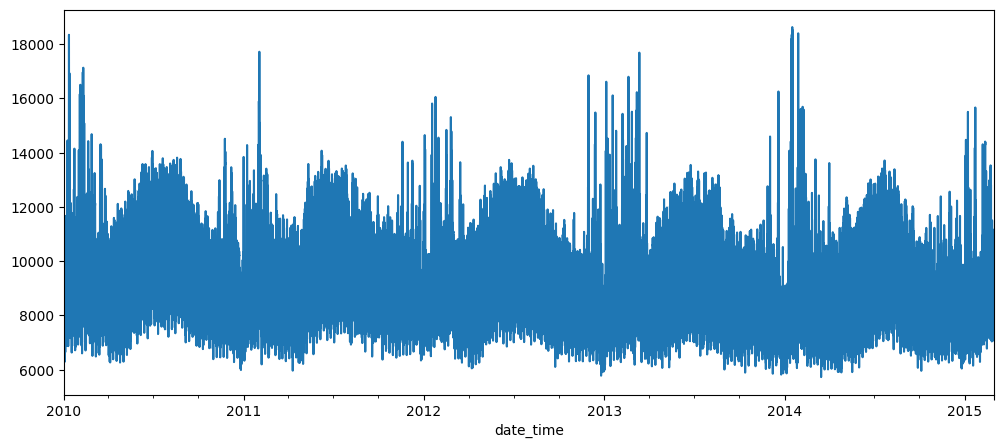

In [19]:
data["demand"].plot(figsize=[12, 5])

<Axes: xlabel='date_time'>

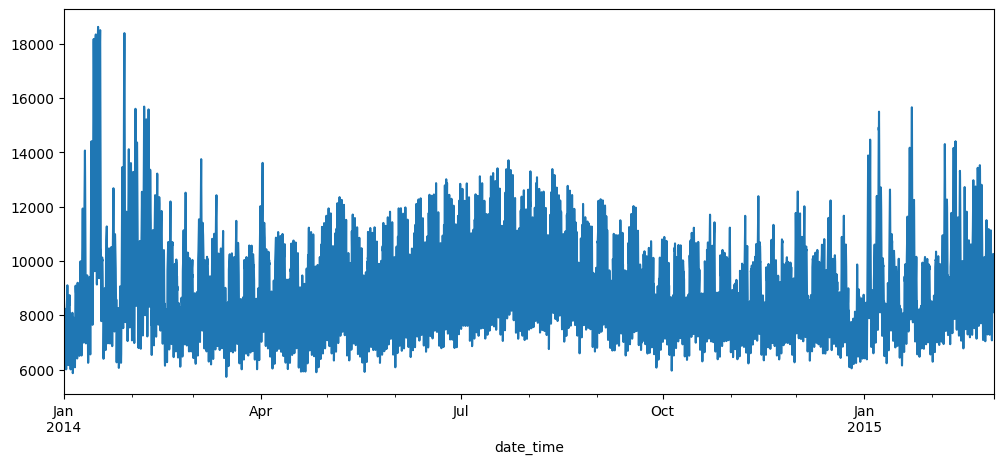

In [20]:
# Plot the data from the year 2014 onwards
data["demand"].loc["2014":].plot(figsize=[12, 5])

<Axes: xlabel='date_time'>

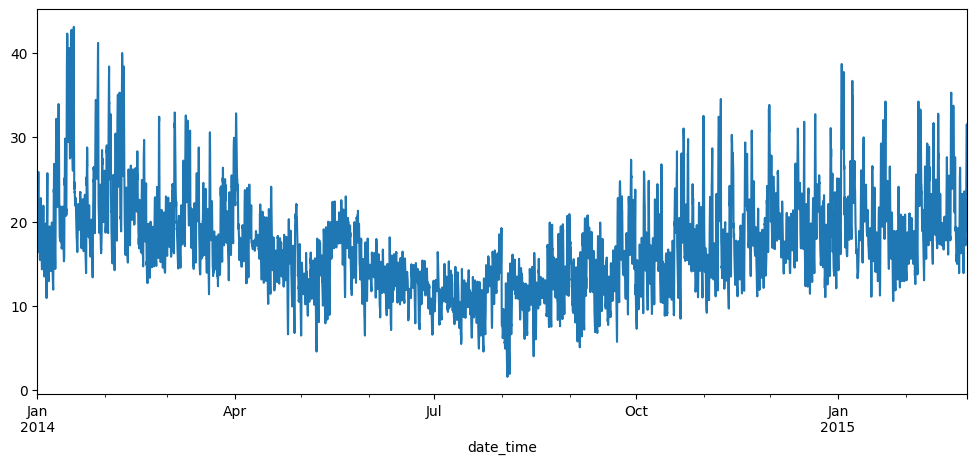

In [21]:
data["temperature"].loc["2014":].plot(figsize=[12, 5])

<Axes: xlabel='date_time'>

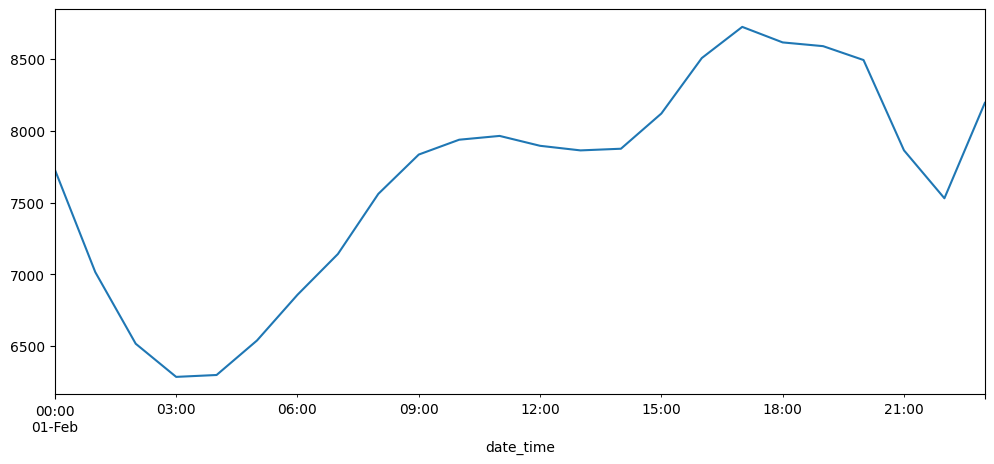

In [22]:
# Demand on a single day
data["demand"].loc["2015-02-01"].plot(figsize=[12, 5])

<Axes: xlabel='date_time'>

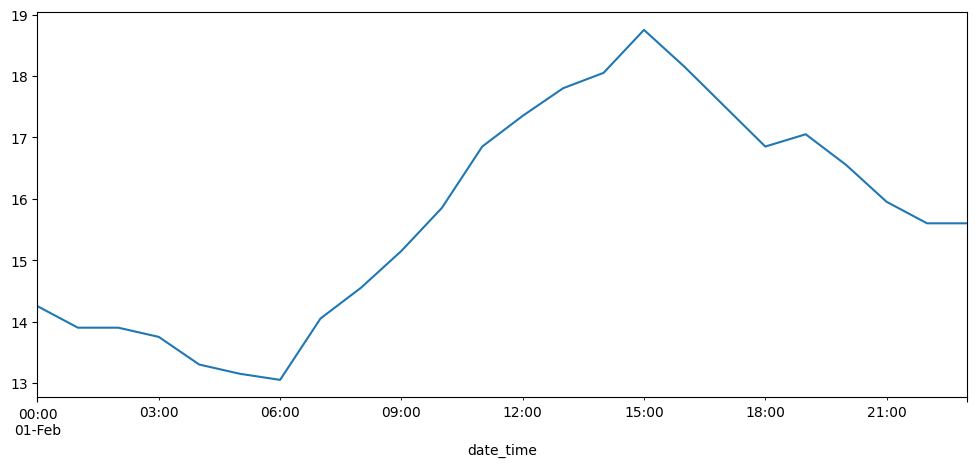

In [23]:
# Temperature on a single day
data["temperature"].loc["2015-02-01"].plot(figsize=[12, 5])

In [24]:
# Create a copy of the data.
df = data.copy()

# Create a custom metric for the MAD
def mad(x):
    return np.median(np.abs(x - np.median(x)))

result = (
    df["demand"]
    .rolling(window=24) # Pick window size.
    .agg(["mean", "std", mad]) # Pick statistics.
    .shift(freq="1h") # Lag by 1 hour to avoid data leakage.
)  

result = result.add_prefix("demand_window_24_")
result

,demand_window_24_mean,demand_window_24_std,demand_window_24_mad
date_time,,,
2010-01-01 01:00:00,NaN,NaN,NaN
2010-01-01 02:00:00,NaN,NaN,NaN
2010-01-01 03:00:00,NaN,NaN,NaN
2010-01-01 04:00:00,NaN,NaN,NaN
2010-01-01 05:00:00,NaN,NaN,NaN
...,...,...,...
2015-02-28 20:00:00,8786.593557,957.615692,621.110944
2015-02-28 21:00:00,8764.566712,948.645664,655.453210
2015-02-28 22:00:00,8750.681279,952.771813,655.453210


In [25]:
df = df.join(result, how="left")
df

,demand,temperature,demand_window_24_mean,demand_window_24_std,demand_window_24_mad
date_time,,,,,
2010-01-01 00:00:00,8314.448682,21.525,NaN,NaN,NaN
2010-01-01 01:00:00,8267.187296,22.400,NaN,NaN,NaN
2010-01-01 02:00:00,7394.528444,22.150,NaN,NaN,NaN
2010-01-01 03:00:00,6952.047520,21.800,NaN,NaN,NaN
2010-01-01 04:00:00,6867.199634,20.250,NaN,NaN,NaN
...,...,...,...,...,...
2015-02-28 19:00:00,9596.777060,28.350,8802.565712,974.759690,712.857278
2015-02-28 20:00:00,8883.230296,22.200,8786.593557,957.615692,621.110944
2015-02-28 21:00:00,8320.260550,18.900,8764.566712,948.645664,655.453210


In [26]:
result = (
    df["demand"]
    .rolling(window=24, min_periods=1) # Pick window size.
    .agg(["mean", "std", mad]) # Pick statistics.
    .shift(freq="1h") # Lag by 1 hour to avoid data leakage.
)  

result = result.add_prefix("demand_window_24_min_periods_")

df = df.join(result, how="left")
df[["demand", "demand_window_24_mean", "demand_window_24_min_periods_mean"]]

,demand,demand_window_24_mean,demand_window_24_min_periods_mean
date_time,,,
2010-01-01 00:00:00,8314.448682,NaN,NaN
2010-01-01 01:00:00,8267.187296,NaN,8314.448682
2010-01-01 02:00:00,7394.528444,NaN,8290.817989
2010-01-01 03:00:00,6952.047520,NaN,7992.054807
2010-01-01 04:00:00,6867.199634,NaN,7732.052986
...,...,...,...
2015-02-28 19:00:00,9596.777060,8802.565712,8802.565712
2015-02-28 20:00:00,8883.230296,8786.593557,8786.593557
2015-02-28 21:00:00,8320.260550,8764.566712,8764.566712


## 2-2. Expanding Window Features

In [27]:
data = pd.read_csv(
    "datasets/victoria_electricity_demand.csv",
    usecols=["demand", "temperature", "date_time"],
    index_col=["date_time"],
    parse_dates=["date_time"],
)
data = data.loc["2010":]
data.head()

,demand,temperature
date_time,,
2010-01-01 00:00:00,8314.448682,21.525
2010-01-01 01:00:00,8267.187296,22.400
2010-01-01 02:00:00,7394.528444,22.150
2010-01-01 03:00:00,6952.047520,21.800
2010-01-01 04:00:00,6867.199634,20.250


In [28]:
# Create a copy of the data.
df = data.copy()

# Create a custom metric for the MAD
def mad(x):
    return np.median(np.abs(x - np.median(x)))

result = (
    df["demand"]
    .expanding()  # Use `expanding` rather than `rolling`.
    .agg(["mean", "std", mad]) # Pick statistics.
    .shift(freq="1H") # Lag by 1 hour to avoid data leakage.
)  

result = result.add_prefix("demand_expanding_window_")
result

/tmp/ipykernel_40903/113132456.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .shift(freq="1H") # Lag by 1 hour to avoid data leakage.


,demand_expanding_window_mean,demand_expanding_window_std,demand_expanding_window_mad
date_time,,,
2010-01-01 01:00:00,8314.448682,NaN,0.000000
2010-01-01 02:00:00,8290.817989,33.418847,23.630693
2010-01-01 03:00:00,7992.054807,518.012283,47.261386
2010-01-01 04:00:00,7732.052986,670.294667,459.960119
2010-01-01 05:00:00,7559.082315,697.542450,527.328810
...,...,...,...
2015-02-28 20:00:00,9463.656071,1752.022191,1307.193992
2015-02-28 21:00:00,9463.643240,1752.004951,1307.102152
2015-02-28 22:00:00,9463.617965,1751.993833,1307.081377


In [29]:
df = df.join(result, how="left")
df

,demand,temperature,demand_expanding_window_mean,demand_expanding_window_std,demand_expanding_window_mad
date_time,,,,,
2010-01-01 00:00:00,8314.448682,21.525,NaN,NaN,NaN
2010-01-01 01:00:00,8267.187296,22.400,8314.448682,NaN,0.000000
2010-01-01 02:00:00,7394.528444,22.150,8290.817989,33.418847,23.630693
2010-01-01 03:00:00,6952.047520,21.800,7992.054807,518.012283,47.261386
2010-01-01 04:00:00,6867.199634,20.250,7732.052986,670.294667,459.960119
...,...,...,...,...,...
2015-02-28 19:00:00,9596.777060,28.350,9463.653128,1752.041445,1307.141316
2015-02-28 20:00:00,8883.230296,22.200,9463.656071,1752.022191,1307.193992
2015-02-28 21:00:00,8320.260550,18.900,9463.643240,1752.004951,1307.102152


## 2-3. Weighted-Rolling Window Features

In [30]:
data = pd.read_csv(
    "datasets/victoria_electricity_demand.csv",
    usecols=["demand", "temperature", "date_time"],
    index_col=["date_time"],
    parse_dates=["date_time"],
)
data = data.loc["2010":]
data.head()

,demand,temperature
date_time,,
2010-01-01 00:00:00,8314.448682,21.525
2010-01-01 01:00:00,8267.187296,22.400
2010-01-01 02:00:00,7394.528444,22.150
2010-01-01 03:00:00,6952.047520,21.800
2010-01-01 04:00:00,6867.199634,20.250


In [31]:
# Create a copy of the data.
df = data.copy()

# Define our own weighted mean function to pass to .apply()
def weighted_mean(x, weights):
    return (weights * x).sum() / weights.sum()

# Define our own weighted std function to pass to .apply()
def weighted_std(x, weights):
    mean_w = weighted_mean(x, weights)
    var_w = (weights * (x - mean_w)**2).sum() / weights.sum()
    return np.sqrt(var_w)

# Specify weights
# Here we shall use linear weights
weights = np.arange(1, 24 * 7 + 1)  # [1, 2, ..., 168]

# Compute weighted mean
result = (
    df["demand"]
    .rolling(window=24 * 7) # Pick window size. Needs to be same as len(weights).
    .apply(weighted_mean, args=(weights,)) # Apply our custom function.
    .shift(freq="1h") # Lag by 1 hour to avoid data leakage.
    .to_frame() # Convert output from Series to DataFrame.
)  

result.columns = ["demand_weighted_window_168_mean"]
result

/tmp/ipykernel_40903/519424142.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .shift(freq="1H") # Lag by 1 hour to avoid data leakage.


,demand_weighted_window_168_mean
date_time,
2010-01-01 01:00:00,NaN
2010-01-01 02:00:00,NaN
2010-01-01 03:00:00,NaN
2010-01-01 04:00:00,NaN
2010-01-01 05:00:00,NaN
...,...
2015-02-28 20:00:00,9466.041052
2015-02-28 21:00:00,9456.912218
2015-02-28 22:00:00,9441.317448


In [32]:
df = df.join(result, how="left")
df

,demand,temperature,demand_weighted_window_168_mean
date_time,,,
2010-01-01 00:00:00,8314.448682,21.525,NaN
2010-01-01 01:00:00,8267.187296,22.400,NaN
2010-01-01 02:00:00,7394.528444,22.150,NaN
2010-01-01 03:00:00,6952.047520,21.800,NaN
2010-01-01 04:00:00,6867.199634,20.250,NaN
...,...,...,...
2015-02-28 19:00:00,9596.777060,28.350,9466.913081
2015-02-28 20:00:00,8883.230296,22.200,9466.041052
2015-02-28 21:00:00,8320.260550,18.900,9456.912218


In [33]:
# Specify weights
weights = np.arange(1, 24 * 7 + 1)  # [1, 2, ..., 168]

# Compute weighted standard deviation
result = (
    df["demand"]
    .rolling(window=24 * 7)  # Pick window size. Needs to be same as len(weights).
    .apply(weighted_std, args=(weights,))  # Apply our custom function.
    .shift(freq="1h")  # Lag by 1 hour to avoid data leakage.
    .to_frame() # Convert output from Series to DataFrame.
)  

result.columns = ["demand_weighted_window_168_std"]

# Join the result back to the original dataframe.
df = df.join(result, how="left")
df

/tmp/ipykernel_40903/236577532.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .shift(freq="1H")  # Lag by 1 hour to avoid data leakage.


,demand,temperature,demand_weighted_window_168_mean,demand_weighted_window_168_std
date_time,,,,
2010-01-01 00:00:00,8314.448682,21.525,NaN,NaN
2010-01-01 01:00:00,8267.187296,22.400,NaN,NaN
2010-01-01 02:00:00,7394.528444,22.150,NaN,NaN
2010-01-01 03:00:00,6952.047520,21.800,NaN,NaN
2010-01-01 04:00:00,6867.199634,20.250,NaN,NaN
...,...,...,...,...
2015-02-28 19:00:00,9596.777060,28.350,9466.913081,1343.553689
2015-02-28 20:00:00,8883.230296,22.200,9466.041052,1333.021400
2015-02-28 21:00:00,8320.260550,18.900,9456.912218,1324.023135


In [34]:
result = (
    df["demand"]
    .rolling(window=24 * 7)  # Pick window size.
    .agg(["mean"])  # Pass our own functions.
    .shift(freq="1h")  # Lag by 1 hour to avoid data leakage.
)  
result

/tmp/ipykernel_40903/3750488716.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .shift(freq="1H")  # Lag by 1 hour to avoid data leakage.


,mean
date_time,
2010-01-01 01:00:00,NaN
2010-01-01 02:00:00,NaN
2010-01-01 03:00:00,NaN
2010-01-01 04:00:00,NaN
2010-01-01 05:00:00,NaN
...,...
2015-02-28 20:00:00,9654.616819
2015-02-28 21:00:00,9638.018555
2015-02-28 22:00:00,9624.108291


In [35]:
result.columns = ["demand_window_168_mean"]

df = df.join(result, how="left")
df

,demand,temperature,demand_weighted_window_168_mean,demand_weighted_window_168_std,demand_window_168_mean
date_time,,,,,
2010-01-01 00:00:00,8314.448682,21.525,NaN,NaN,NaN
2010-01-01 01:00:00,8267.187296,22.400,NaN,NaN,NaN
2010-01-01 02:00:00,7394.528444,22.150,NaN,NaN,NaN
2010-01-01 03:00:00,6952.047520,21.800,NaN,NaN,NaN
2010-01-01 04:00:00,6867.199634,20.250,NaN,NaN,NaN
...,...,...,...,...,...
2015-02-28 19:00:00,9596.777060,28.350,9466.913081,1343.553689,9670.463454
2015-02-28 20:00:00,8883.230296,22.200,9466.041052,1333.021400,9654.616819
2015-02-28 21:00:00,8320.260550,18.900,9456.912218,1324.023135,9638.018555


Text(0.5, 0, 'Time')

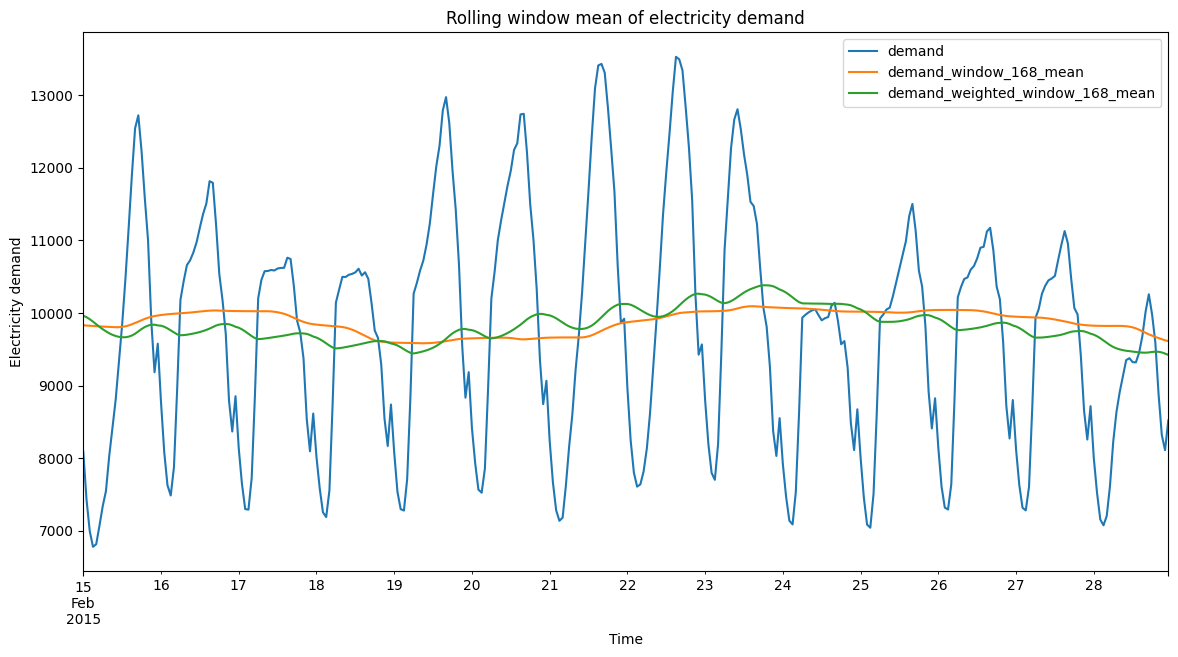

In [36]:
cols = ["demand", "demand_window_168_mean", "demand_weighted_window_168_mean"]

ax = (
    df.iloc[-24 * 7 * 2 :] # Let's look at the last 2 weeks of data
      .loc[:, cols] # Filter to columns of interest
      .plot(figsize=[14, 7])
    )  

ax.set_title("Rolling window mean of electricity demand")
ax.set_ylabel("Electricity demand")
ax.set_xlabel("Time")

In [37]:
# Define our own weighted mean function with weights defined inside
def weighted_mean(x):
    weights = np.arange(1, 24 * 7 + 1) # [1, 2, ..., 168]
    return (weights * x).sum() / weights.sum()

result = (
    df["demand"]
    .rolling(window=24 * 7)  # Pick window size. Needs to be same as len(weights).
    .agg(["mean", "std", weighted_mean])  # Can include custom functions
    .shift(freq="1h")  # Lag by 1 hour to avoid data leakage.
)  
result

,mean,std,weighted_mean
date_time,,,
2010-01-01 01:00:00,NaN,NaN,NaN
2010-01-01 02:00:00,NaN,NaN,NaN
2010-01-01 03:00:00,NaN,NaN,NaN
2010-01-01 04:00:00,NaN,NaN,NaN
2010-01-01 05:00:00,NaN,NaN,NaN
...,...,...,...
2015-02-28 20:00:00,9654.616819,1526.838185,9466.041052
2015-02-28 21:00:00,9638.018555,1519.920008,9456.912218
2015-02-28 22:00:00,9624.108291,1521.229942,9441.317448


# 3. Trend Features
## 3-1. Linear Trends
### 3-1-1. Linear Trend with pandas

In [38]:
!wget https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv -P datasets/

--2024-11-29 20:29:40--  https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2165 (2.1K) [text/plain]
Saving to: ‘datasets/example_air_passengers.csv’

example_air_passeng 100%[===================>]   2.11K  --.-KB/s    in 0s      

2024-11-29 20:29:40 (28.4 MB/s) - ‘datasets/example_air_passengers.csv’ saved [2165/2165]



In [39]:
data = pd.read_csv(
    "datasets/example_air_passengers.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)
data.head()

,y
ds,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


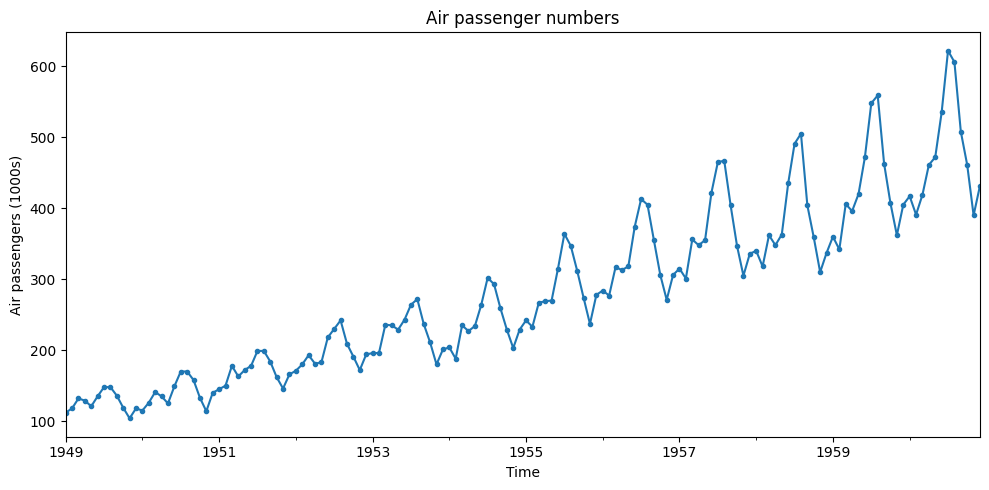

In [40]:
fig, ax = plt.subplots(figsize=[10, 5])
data.plot(y="y", marker=".", figsize=[10, 5], legend=None, ax=ax)
ax.set_xlabel("Time")
ax.set_ylabel("Air passengers (1000s)")
ax.set_title("Air passenger numbers")
plt.tight_layout()

In [43]:
df = data.copy()

df["t"] = np.round((df.index - df.index.min()) / np.timedelta64(30, "D"))
df.head()

,y,t
ds,,
1949-01-01,112,0.0
1949-02-01,118,1.0
1949-03-01,132,2.0
1949-04-01,129,3.0
1949-05-01,121,4.0


### 3-1-2. Linear Trend with sktime

In [46]:
from sktime.transformations.series.time_since import TimeSince

In [47]:
# Start with the original data again.
df = data.copy()

transformer = TimeSince(
    start=["1949-01-01", "1949-02-01"],  # A list of start dates.
    # If `None`, uses earliest time in dataframe.
    to_numeric=True,  # Convert output to integer or keep as time-like.
    # Default is `True`
    freq="MS",  # Specify time series frequency if not specified in dataframe.
    # Default is `None` and it is inferred from the dataframe index.
    positive_only=False,  # Set negative values to zero.
    # Default is `False`
    keep_original_columns=False,  # Keep the other columns in the dataframe
    # after passing to `.transform()`.
    # Default is `False`
)

transformer.fit(df)

TimeSince(freq='MS', start=['1949-01-01', '1949-02-01'])

In [48]:
print(
    [
        transformer.start,
        transformer.freq,
    ]
)

[['1949-01-01', '1949-02-01'], 'MS']


In [49]:
transformer.transform(df)

,time_since_1949-01-01 00:00:00,time_since_1949-02-01 00:00:00
ds,,
1949-01-01,0,-1
1949-02-01,1,0
1949-03-01,2,1
1949-04-01,3,2
1949-05-01,4,3
...,...,...
1960-08-01,139,138
1960-09-01,140,139
1960-10-01,141,140


In [50]:
transformer = TimeSince()
transformer.fit_transform(df)

,time_since_1949-01-01 00:00:00
ds,
1949-01-01,0
1949-02-01,1
1949-03-01,2
1949-04-01,3
1949-05-01,4
...,...
1960-08-01,139
1960-09-01,140
1960-10-01,141


In [51]:
transformer = TimeSince(keep_original_columns=True)
transformer.fit_transform(df)

,y,time_since_1949-01-01 00:00:00
ds,,
1949-01-01,112,0
1949-02-01,118,1
1949-03-01,132,2
1949-04-01,129,3
1949-05-01,121,4
...,...,...
1960-08-01,606,139
1960-09-01,508,140
1960-10-01,461,141


## 3-2. Non-Linear Trends

In [52]:
data = pd.read_csv(
    "datasets/example_air_passengers.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)
data.head()

,y
ds,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [53]:
# Requires version 0.14.1 or greater of sktime.
from sktime.transformations.series.time_since import TimeSince

# Create a new copy of the original data.
df = data.copy()

time_since_transformer = TimeSince(keep_original_columns=True, freq="MS")

# Compute the time since the start of the time series
df = time_since_transformer.fit_transform(df)
df.head()

,y,time_since_1949-01-01 00:00:00
ds,,
1949-01-01,112,0
1949-02-01,118,1
1949-03-01,132,2
1949-04-01,129,3
1949-05-01,121,4


In [54]:
df["t^2"] = df["time_since_1949-01-01 00:00:00"] ** 2
df.head()

,y,time_since_1949-01-01 00:00:00,t^2
ds,,,
1949-01-01,112,0,0
1949-02-01,118,1,1
1949-03-01,132,2,4
1949-04-01,129,3,9
1949-05-01,121,4,16


In [55]:
# Let's ensure all sklearn transformers output pandas dataframes
from sklearn import set_config
from sklearn.preprocessing import PolynomialFeatures

set_config(transform_output="pandas")  # Upgrade to scikit-learn 0.12
                                       # for this feature

# Create and use the polynomial transformer.
poly_transformer = PolynomialFeatures(
    degree=2, # degree of polynomial
    include_bias=False  # exclude constant term
)

# Create polynomial features from a given column
result = poly_transformer.fit_transform(df[["time_since_1949-01-01 00:00:00"]])
result

,time_since_1949-01-01 00:00:00,time_since_1949-01-01 00:00:00^2
ds,,
1949-01-01,0.0,0.0
1949-02-01,1.0,1.0
1949-03-01,2.0,4.0
1949-04-01,3.0,9.0
1949-05-01,4.0,16.0
...,...,...
1960-08-01,139.0,19321.0
1960-09-01,140.0,19600.0
1960-10-01,141.0,19881.0


In [56]:
from sklearn.pipeline import make_pipeline

time_feats = make_pipeline(TimeSince(freq="MS"), PolynomialFeatures(degree=2, include_bias=False))

# Create a new copy of the original data.
df = data.copy()

result = time_feats.fit_transform(df)
result

,time_since_1949-01-01 00:00:00,time_since_1949-01-01 00:00:00^2
ds,,
1949-01-01,0.0,0.0
1949-02-01,1.0,1.0
1949-03-01,2.0,4.0
1949-04-01,3.0,9.0
1949-05-01,4.0,16.0
...,...,...
1960-08-01,139.0,19321.0
1960-09-01,140.0,19600.0
1960-10-01,141.0,19881.0


## 3-3. Changepoints

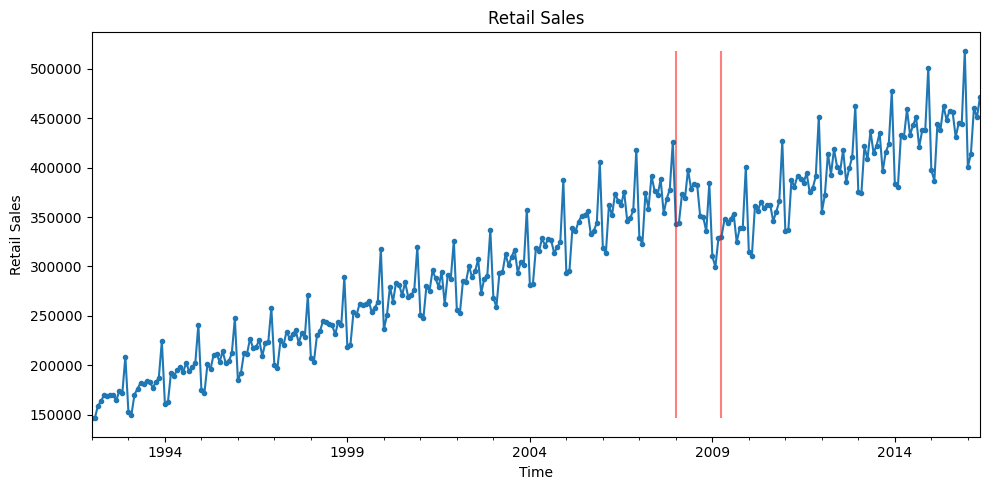

In [57]:
data = pd.read_csv(
    "datasets/example_retail_sales.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)

fig, ax = plt.subplots(figsize=[10, 5])
data.plot(y="y", marker=".", figsize=[10, 5], legend=None, ax=ax)
ax.set_xlabel("Time")
ax.set_ylabel("Retail Sales")
ax.set_title("Retail Sales")
ax.vlines(
    ["2008-01-01", "2009-04-01"],
    ymin=data["y"].min(),
    ymax=data["y"].max(),
    color="r",
    alpha=0.5,
)
plt.tight_layout()

In [59]:
df = data.copy()

changepoints = [
    "1992-01-01",  # start of time series
    "2008-01-01",  # changepoint
    "2009-04-01",  # changepoint
]

for changepoint in changepoints:
    changepoint_dt = pd.to_datetime(changepoint)
    feat_name = f"time_since_{changepoint_dt}"
    time_diff = df.index - changepoint_dt
    # Convert from time delta to numeric
    time_diff = np.round(time_diff / np.timedelta64(30, "D"))
    df[feat_name] = time_diff
    df[feat_name] = df[feat_name].clip(0)

df.loc[
    changepoint_dt - np.timedelta64(3 * 30, "D") : changepoint_dt + np.timedelta64(3 * 30, "D")
]

,y,time_since_1992-01-01 00:00:00,time_since_2008-01-01 00:00:00,time_since_2009-04-01 00:00:00
ds,,,,
2009-01-01,310269,207.0,12.0,0.0
2009-02-01,299488,208.0,13.0,0.0
2009-03-01,328568,209.0,14.0,0.0
2009-04-01,329866,210.0,15.0,0.0
2009-05-01,347768,211.0,16.0,1.0
2009-06-01,344439,212.0,17.0,2.0


# 4. Seasonality Features
## 4-1. Seasonal Lag Features

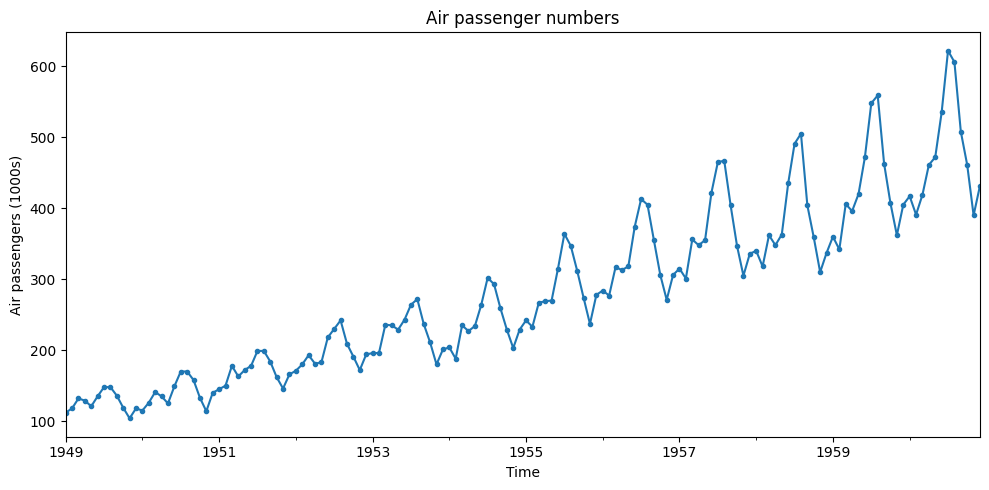

In [60]:
data = pd.read_csv(
    "datasets/example_air_passengers.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)

fig, ax = plt.subplots(figsize=[10, 5])
data.plot(y="y", marker=".", figsize=[10, 5], legend=None, ax=ax)
ax.set_xlabel("Time")
ax.set_ylabel("Air passengers (1000s)")
ax.set_title("Air passenger numbers")
plt.tight_layout()

In [61]:
# --- The transformers from earlier in the course. --- #
# Lag and window features
from sktime.transformations.series.summarize import WindowSummarizer
# Time features for trend 
from sktime.transformations.series.time_since import TimeSince
from sklearn.preprocessing import PolynomialFeatures
# Rescaling transformer for linear models with regularisation
from sklearn.preprocessing import MinMaxScaler
# Pipelines to create feature engineering pipeline
from sklearn.pipeline import make_pipeline, make_union
# Used to reset sklearn estimators
from sklearn.base import clone

# Let's ensure all sklearn transformers output pandas dataframes
from sklearn import set_config
set_config(transform_output="pandas")  # Upgrade to scikit-learn >= 0.12
                                       # for this feature

df = data.copy()
df.head()

,y
ds,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [62]:
target = ["y"]  # Note: it's in a list.
# This ensures we'll get
# a dataframe when using df.loc[:, target]
# rather than a pandas Series.
# This can also be useful if we have
# multiple targets.

# Polynomial time features for trend
time_feats = make_pipeline(
    TimeSince(), PolynomialFeatures(degree=2, include_bias=False)
)


# Compute lag and window features.
lag_window_feats = WindowSummarizer(
    lag_feature={
        "lag": [1, 12],  # Just using the previous lag and a seasonal lag
    },
    target_cols=target,
    truncate="bfill",  # Backfill missing values from lagging and windowing.
)

# To see how the lag features help
# try commenting them out and just using
# lag features, then try just using datetime
# features.
pipeline = make_union(
    time_feats,
    lag_window_feats,
)

# Apply min-max scaling to all the features
pipeline = make_pipeline(pipeline, MinMaxScaler())
pipeline

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('pipeline',
                                                 Pipeline(steps=[('timesince',
                                                                  TimeSince()),
                                                                 ('polynomialfeatures',
                                                                  PolynomialFeatures(include_bias=False))])),
                                                ('windowsummarizer',
                                                 WindowSummarizer(lag_feature={'lag': [1, 12]}, target_cols=['y'],
                 truncate='bfill'))])),
                ('minmaxscaler', MinMaxScaler())])

In [63]:
pipeline.fit_transform(df.head(25))

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/sktime/transformations/series/summarize.py:299: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 12]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  func_dict.loc[:, "window"] = func_dict["window"].astype("object")


,time_since_1949-01-01 00:00:00,time_since_1949-01-01 00:00:00^2,y_lag_1,y_lag_12
ds,,,,
1949-01-01,0.000000,0.000000,0.121212,0.181818
1949-02-01,0.041667,0.001736,0.121212,0.181818
1949-03-01,0.083333,0.006944,0.212121,0.181818
1949-04-01,0.125000,0.015625,0.424242,0.181818
1949-05-01,0.166667,0.027778,0.378788,0.181818
1949-06-01,0.208333,0.043403,0.257576,0.181818
1949-07-01,0.250000,0.062500,0.469697,0.181818
1949-08-01,0.291667,0.085069,0.666667,0.181818
1949-09-01,0.333333,0.111111,0.666667,0.181818


In [66]:
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor

# We can use `clone` to return an unfitted version
# of the pipeline.
pipeline = clone(pipeline)

# --- CONFIG --- #
# Define time of first forecast, this determines our train / test split.
forecast_start_time = df.index.max() - pd.DateOffset(months=36)  # Start 3 years from the end. 

# Define number of steps to forecast.
num_of_forecast_steps = 12 * 3  # 3 years into the future

# Define the model.
model = LinearRegression()

# Create a list of periods that we'll forecast over.
forecast_horizon = pd.date_range(
    forecast_start_time, periods=num_of_forecast_steps, freq="MS"
)

# How much data in the past is needed to create our features
look_back_window_size = pd.DateOffset(months=12)  # We need the latest 12 time periods
                                                  # in our predict dataframe to build our
                                                  # lag features.

# --- CREATE TRAINING & TESTING DATAFRAME  --- #
# Ensure we only have training data up to the start
# of the forecast.
df_train = df.loc[df.index < forecast_start_time].copy()
df_test = df.loc[df.index >= forecast_start_time].copy()

# --- FEATURE ENGINEERING--- #
# Create X_train and y_train
y_train = df_train[target]
X_train = pipeline.fit_transform(df_train)

# LightGBM cannot handle column names which have
# certain characters (e.g., ":"). We replace these
# with `_`.
if "lightgbm" in model.__module__:  # checks if model is from lightgbm
    X_train = X_train.rename(columns=lambda x: re.sub("[^A-Za-z0-9_]+", "_", x))


# --- MODEL TRAINING---#
# Train one-step ahead forecast model
model.fit(X_train, y_train)

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/sktime/transformations/series/summarize.py:299: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 12]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  func_dict.loc[:, "window"] = func_dict["window"].astype("object")


LinearRegression()

Text(0.5, 1.0, 'Recursive forecast with LinearRegression()')

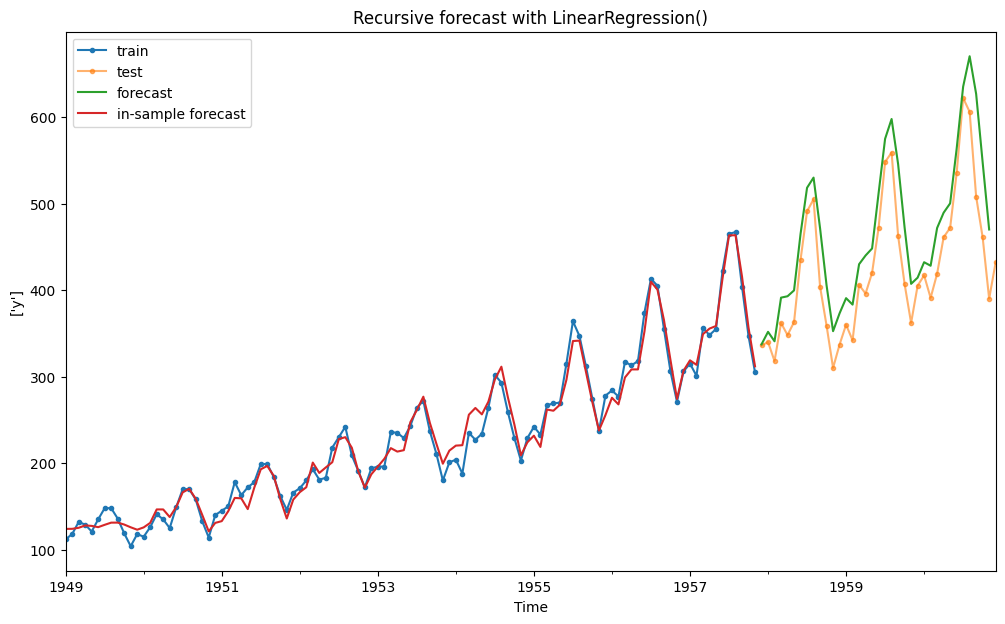

In [68]:
# --- CREATE DYNAMIC PREDICTION DATAFRAME  --- #
# We will recursively append our forecasts to this
# dataframe and re-compute our lag and window features from the
# target in this dataframe. It contains data in both the training period
# and forecast period which is needed for some transformers (e.g., lags and windows).
look_back_start_time = forecast_start_time - look_back_window_size

# Create `df_predict` which has data going as far back
# as needed to create features which need past values.
df_predict = df_train.loc[look_back_start_time:].copy()

# Extend index into forecast horizon
df_predict = pd.concat([df_predict, pd.DataFrame(index=forecast_horizon)])

# --- RECURSIVE FORECASTING LOOP --- #
for forecast_time in forecast_horizon:
    # Compute features during the forecast horizon
    X_test_ = pipeline.transform(df_predict)
    X_test = X_test_.loc[[forecast_time]]

    # Predict one step ahead.
    y_pred = model.predict(X_test)

    # Append forecast to the target variable columnn in our
    # dynamic forecast dataframe `df_predict`. This `df_predict`
    # is ready for the next iteration where we will re-compute
    # features derived from the target such as lags and windows.
    df_predict.loc[[forecast_time], target] = y_pred

# --- GET FORECAST AND TEST VALUES --- #
y_forecast = df_predict.loc[forecast_horizon, target]
y_test = df_test.loc[forecast_start_time:, target]

# --- CREATE IN-SAMPLE PREDICTIONS--- #
y_forecast_train = model.predict(X_train)
y_forecast_train = pd.DataFrame(y_forecast_train, index=X_train.index, columns=target)

# --- PLOTTING --- #
# Plot the forecast.
fig, ax = plt.subplots(figsize=[12, 7])

# Plot training set.
y_train.plot(ax=ax, marker=".")
# Plot actuals in forecasting horizon.
y_test.plot(ax=ax, marker=".", alpha=0.6)
# Plot forecast.
y_forecast.plot(ax=ax)
# Plot 1 step forecasts in training data.
y_forecast_train.plot(ax=ax)

ax.legend(["train", "test", "forecast", "in-sample forecast"])
ax.set_xlabel("Time")
ax.set_ylabel(f"{target}")
ax.set_title(f"Recursive forecast with {model}")

In [69]:
# Compute error metrics.
from sklearn.metrics import mean_squared_error

mean_squared_error(
    y_true=y_test.loc[y_forecast.index], y_pred=y_forecast, squared=False
)

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


46.87136907684175

## 4-2. Calendar Features

In [71]:
data = pd.read_csv(
    "datasets/victoria_electricity_demand.csv",
    usecols=["demand", "date_time"],
    parse_dates=["date_time"],
    index_col=["date_time"],
)
data.shape

(115368, 1)

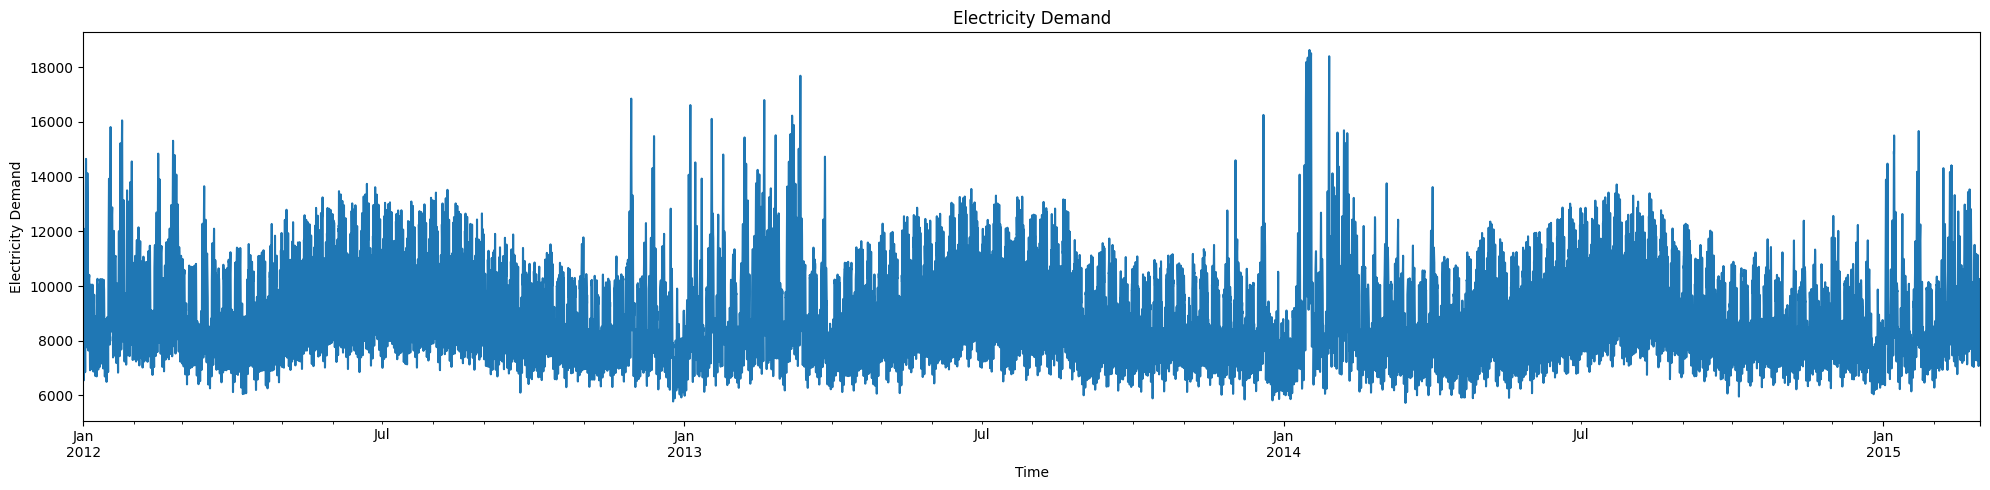

In [72]:
fig, ax = plt.subplots(figsize=[20, 5])
data.loc["2012":].plot(y="demand", legend=None, ax=ax)
ax.set_xlabel("Time")
ax.set_ylabel("Electricity Demand")
ax.set_title("Electricity Demand")
plt.tight_layout()

In [73]:
from sktime.transformations.series.date import DateTimeFeatures

In [74]:
transformer = DateTimeFeatures(ts_freq="H", # Frequency of the time series
                               feature_scope="comprehensive", # Can be "comprehensive", 
                                                              # "efficient", "minimal".
                                                              # Depending on the time series
                                                              # frequency a sensible set is 
                                                              # automatically chosen.
                               keep_original_columns=True, # Flag if we want to keep columns
                                                           # in the dataframe passed to `transform`.
                              )

transformer.fit(data) # This transformer has a fit method which does
                      # not learn any parameters. sktime still  
                      # performs a series of checks when we call `fit` on the time series 
                      # (e.g., is the time series sorted?, are there missing timestamps?).
            
result = transformer.transform(data) # Create the features from the datetime index. 
result.head()

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/sktime/transformations/series/date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(
/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/sktime/transformations/series/date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(


,demand,year,quarter_of_year,month_of_year,week_of_year,day_of_year,month_of_quarter,week_of_quarter,day_of_quarter,week_of_month,day_of_month,day_of_week,hour_of_day,hour_of_week,is_weekend
date_time,,,,,,,,,,,,,,,
2002-01-01 00:00:00,6919.366092,2002,1,1,1,1,1,2,1,1,1,1,0,24,0
2002-01-01 01:00:00,7165.974188,2002,1,1,1,1,1,2,1,1,1,1,1,25,0
2002-01-01 02:00:00,6406.542994,2002,1,1,1,1,1,2,1,1,1,1,2,26,0
2002-01-01 03:00:00,5815.537828,2002,1,1,1,1,1,2,1,1,1,1,3,27,0
2002-01-01 04:00:00,5497.732922,2002,1,1,1,1,1,2,1,1,1,1,4,28,0


In [75]:
# Specify which datetime features to create
datetime_features = [
                       "year",
                       "month_of_year",
                       "week_of_year",
                       "day_of_year",
                       "day_of_week",
                       "hour_of_day",
                       "is_weekend",
                    ]

# Create the DateTimeFeatures transformer
transformer = DateTimeFeatures( # We do not need to specify the frequency of the time series
                                # if we are manually selecting which features to create.
                               manual_selection=datetime_features, # Select which features to
                                                                   # create.
                               keep_original_columns=True, # Flag if we want to keep columns
                                                            # in dataframe passed to `transform`.
                              )

# Fit and transform to create our features
result = transformer.fit_transform(data)
result

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/sktime/transformations/series/date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(
/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/sktime/transformations/series/date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(


,demand,year,month_of_year,week_of_year,day_of_year,day_of_week,hour_of_day,is_weekend
date_time,,,,,,,,
2002-01-01 00:00:00,6919.366092,2002,1,1,1,1,0,0
2002-01-01 01:00:00,7165.974188,2002,1,1,1,1,1,0
2002-01-01 02:00:00,6406.542994,2002,1,1,1,1,2,0
2002-01-01 03:00:00,5815.537828,2002,1,1,1,1,3,0
2002-01-01 04:00:00,5497.732922,2002,1,1,1,1,4,0
...,...,...,...,...,...,...,...,...
2015-02-28 19:00:00,9596.777060,2015,2,9,59,5,19,1
2015-02-28 20:00:00,8883.230296,2015,2,9,59,5,20,1
2015-02-28 21:00:00,8320.260550,2015,2,9,59,5,21,1


Text(0.5, 1.0, 'Mean electricity demand vs hour of day')

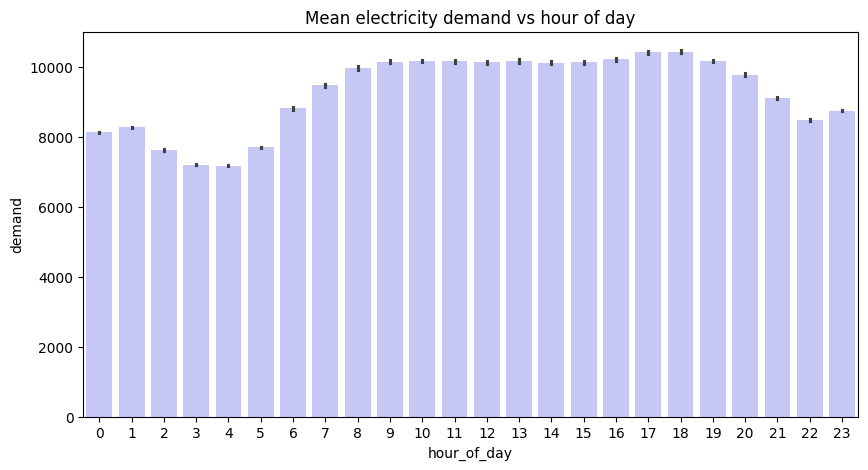

In [76]:
# Plot average demand by hour of day
# to understand daily seasonality. 
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=result, y="demand", x="hour_of_day", ax=ax, color='b', alpha=0.25)
ax.set_title("Mean electricity demand vs hour of day")

<Axes: xlabel='day_of_week', ylabel='demand'>

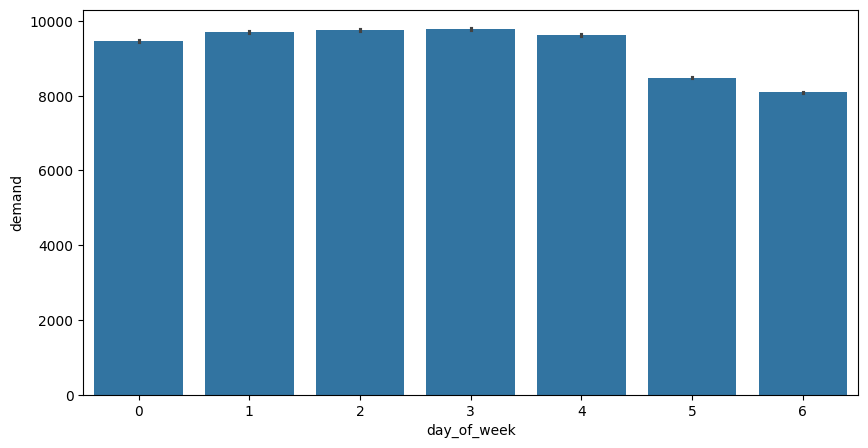

In [77]:
# Plot average demand by day of week
# to understand weekly seasonality. 
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=result, 
            y="demand",
            x="day_of_week",
            ax=ax)

<Axes: xlabel='month_of_year', ylabel='demand'>

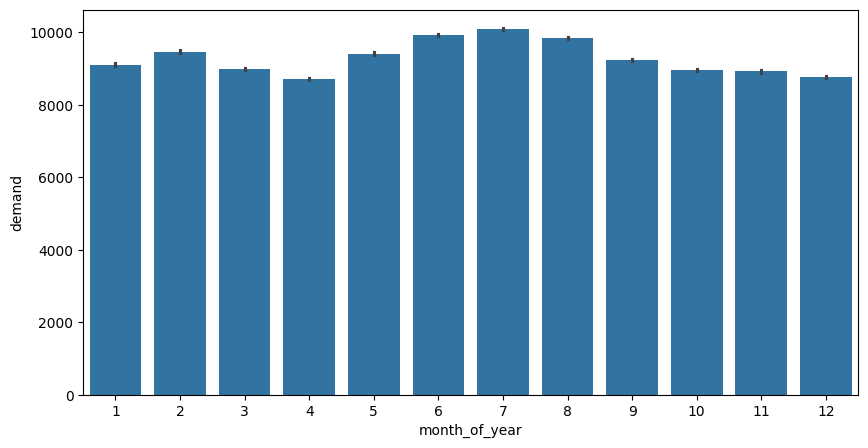

In [78]:
# Plot average demand by month of year
# to understand yearly seasonality. 
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=result, y="demand", x="month_of_year", ax=ax)

## 4-3. Seasonal Dummy Features
### 4-3-1. Seasonal Dummy Features with sklearn

In [79]:
data = pd.read_csv(
    "datasets/victoria_electricity_demand.csv",
    usecols=["demand", "date_time"],
    parse_dates=["date_time"],
    index_col=["date_time"],
)
data.shape

(115368, 1)

In [81]:
from sklearn.preprocessing import OneHotEncoder

# Let's ensure all sklearn transformers output pandas dataframes
from sklearn import set_config
set_config(transform_output="pandas")  

In [82]:
df = data.copy()

df["month_of_year"] = df.index.month
df["week_of_year"] = df.index.isocalendar().week

transformer = OneHotEncoder(sparse_output=False, # Required to enable
                                                 # pandas output.
                            drop="first", # To avoid the dummy variable
                                          # trap we drop the first dummy.
                            )

result = transformer.fit_transform(df[["month_of_year", "week_of_year"]])
result.head()

,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,...,week_of_year_44.0,week_of_year_45.0,week_of_year_46.0,week_of_year_47.0,week_of_year_48.0,week_of_year_49.0,week_of_year_50.0,week_of_year_51.0,week_of_year_52.0,week_of_year_53.0
date_time,,,,,,,,,,,,,,,,,,,,,
2002-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4-3-2. Seasonal Dummy Features with sklearn & sktime

In [83]:
from sktime.transformations.series.date import DateTimeFeatures
from sklearn.pipeline import make_pipeline

In [84]:
# Specify which datetime features to create 
# and then convert into dummy/one hot features.
seasonal_dummies = [
                    "week_of_year",
                    "month_of_year",
                   ]


# Create the DateTimeFeatures transformer
datetime_transformer = DateTimeFeatures(manual_selection=seasonal_dummies, # Select which features to
                                                                           # create
                                       keep_original_columns=False, # Flag if we want to keep columns
                                                                    # in dataframe passed to `transform`.
                                      )

# One hot encoder
one_hot_encoder = OneHotEncoder(sparse_output=False, # Required to enable
                                                     # pandas output.
                                drop="first"
                               )

# Combine the two transformers in a pipeline
seasonal_dummies_feats = make_pipeline(datetime_transformer, one_hot_encoder)
seasonal_dummies_feats

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/sktime/transformations/series/date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(


Pipeline(steps=[('datetimefeatures',
                 DateTimeFeatures(manual_selection=['week_of_year', 'month_of_year'])),
                ('onehotencoder',
                 OneHotEncoder(drop='first', sparse_output=False))])

In [85]:
# Fit and transform to create our features
result = seasonal_dummies_feats.fit_transform(data)
result.head()

/home/yungshun317/envs/yungshun-py3/lib/python3.12/site-packages/sktime/transformations/series/date.py:448: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  DUMMIES = DUMMIES.replace(


,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,...,week_of_year_44,week_of_year_45,week_of_year_46,week_of_year_47,week_of_year_48,week_of_year_49,week_of_year_50,week_of_year_51,week_of_year_52,week_of_year_53
date_time,,,,,,,,,,,,,,,,,,,,,
2002-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5. Date & Time Features

In [86]:
file = "datasets/online_retail_ii/online_retail_ii.xlsx"

df_1 = pd.read_excel(file, sheet_name="Year 2009-2010")
df_2 = pd.read_excel(file, sheet_name="Year 2010-2011")

df = pd.concat([df_1, df_2])
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [88]:
# Rename columns
df.columns = [
    "invoice",
    "stock_code",
    "description",
    "quantity",
    "invoice_date",
    "price",
    "customer_id",
    "country",
]
df.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [89]:
mask = ~df["customer_id"].isnull()
df = df[mask]

df["is_cancelled"] = df["invoice"].apply(lambda x: str(x)[0] == "C")

mask = ~(~df["is_cancelled"] & df["quantity"] < 0)

df = df[mask]

df["revenue"] = df["quantity"] * df["price"]

mask = ~df["is_cancelled"]
df.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country,is_cancelled,revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,False,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,False,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,False,30.0


In [90]:
# If running this raises an UnsupportedFunctionCall error
# try upgrading your version of pandas.
df_gross = (
    df.loc[mask, ["invoice_date", "quantity", "revenue", "country"]]
    .groupby("country")
    .resample("W", on="invoice_date")
    .sum(numeric_only=True)
)

df_gross.index.rename(["country", "week"], inplace=True)
df_gross.head()

quantity  revenue
country   week                         
Australia 2009-12-06       100    196.1
          2009-12-13         0      0.0
          2009-12-20        60     75.0
          2009-12-27         0      0.0
          2010-01-03         0      0.0

In [91]:
df_gross_countries = df_gross.reset_index(level="country")

countries = [
    'United Kingdom',
    'Belgium',
    "EIRE",
    'Germany',
    "France",
    'Spain',
]

df_gross_countries[df_gross_countries["country"].isin(countries)].to_csv(
    "datasets/online_retail_dataset_countries.csv",
    index=True,
)

y = df_gross.unstack("country")["revenue"]
y.head()

country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,Singapore,Spain,Sweden,Switzerland,Thailand,USA,United Arab Emirates,United Kingdom,Unspecified,West Indies
week,,,,,,,,,,,,,,,,,,,,,
2009-12-06,196.1,NaN,NaN,439.1,NaN,NaN,989.18,760.69,NaN,1008.00,...,NaN,435.88,NaN,NaN,NaN,141.0,NaN,213000.35,NaN,NaN
2009-12-13,0.0,1429.83,NaN,8.5,NaN,NaN,0.00,0.00,NaN,0.00,...,NaN,412.60,285.3,NaN,NaN,0.0,517.7,195810.04,NaN,NaN
2009-12-20,75.0,0.00,NaN,0.0,NaN,NaN,0.00,2796.29,NaN,429.66,...,NaN,1952.64,0.0,589.4,NaN,0.0,0.0,182396.74,NaN,NaN
2009-12-27,0.0,568.51,NaN,0.0,NaN,NaN,0.00,0.00,NaN,0.00,...,NaN,5149.06,0.0,0.0,NaN,0.0,0.0,22007.77,NaN,NaN
2010-01-03,0.0,0.00,NaN,0.0,NaN,NaN,0.00,0.00,NaN,0.00,...,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.00,NaN,NaN


In [92]:
y.to_csv("datasets/online_retail_dataset.csv")

## 5-1. Date-Related Features

In [96]:
# File path:
file = "datasets/online_retail_ii/online_retail_ii.xlsx"

# The data is provided as two sheets in a single Excel file.
# Each sheet contains a different time period.
# Load both and join them into a single dataframe
# as shown below:

df_1 = pd.read_excel(file, sheet_name="Year 2009-2010")
df_2 = pd.read_excel(file, sheet_name="Year 2010-2011")

data = pd.concat([df_1, df_2])

print(data.shape)

data.head()

(1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [97]:
# Let's determine the type of data in the datetime variable.
data["InvoiceDate"].dtypes

dtype('<M8[ns]')

In [98]:
# This is how we parse date strings into datetime format:
data["date"] = pd.to_datetime(data["InvoiceDate"])
data[["date", "InvoiceDate"]].head()

,date,InvoiceDate
0,2009-12-01 07:45:00,2009-12-01 07:45:00
1,2009-12-01 07:45:00,2009-12-01 07:45:00
2,2009-12-01 07:45:00,2009-12-01 07:45:00
3,2009-12-01 07:45:00,2009-12-01 07:45:00
4,2009-12-01 07:45:00,2009-12-01 07:45:00


In [99]:
# Let's inspect the new data type.
data[["date", "InvoiceDate"]].dtypes

date           datetime64[ns]
InvoiceDate    datetime64[ns]
dtype: object

In [100]:
# Extract the date part.
data["date_part"] = data["date"].dt.date
data["date_part"].head()

0    2009-12-01
1    2009-12-01
2    2009-12-01
3    2009-12-01
4    2009-12-01
Name: date_part, dtype: object

In [101]:
# Extract the time part.
# (we don't need it for this demo,
# so I will not add it to the dataframe).
time_ = data["date"].dt.time
time_.head()

0    07:45:00
1    07:45:00
2    07:45:00
3    07:45:00
4    07:45:00
Name: date, dtype: object

### 5-1-1. Year

In [102]:
# Extract year.
data["invoice_year"] = data["date"].dt.year
data[["invoice_year", "date"]].head()

,invoice_year,date
0,2009,2009-12-01 07:45:00
1,2009,2009-12-01 07:45:00
2,2009,2009-12-01 07:45:00
3,2009,2009-12-01 07:45:00
4,2009,2009-12-01 07:45:00


In [103]:
# Show unique values in the new variable.
data["invoice_year"].unique()

array([2009, 2010, 2011], dtype=int32)

### 5-1-2. Year Start & End

In [104]:
# Extract year start and year end.
data["invoice_year_start"] = data["date"].dt.is_year_start
data["invoice_year_end"] = data["date"].dt.is_year_end
data[["invoice_year_start", "invoice_year_end", "date"]].head()

,invoice_year_start,invoice_year_end,date
0,False,False,2009-12-01 07:45:00
1,False,False,2009-12-01 07:45:00
2,False,False,2009-12-01 07:45:00
3,False,False,2009-12-01 07:45:00
4,False,False,2009-12-01 07:45:00


In [105]:
data["invoice_year_start"].unique()

array([False])

In [106]:
data["invoice_year_end"].unique()

array([False])

### 5-1-3. Leap Year

In [107]:
# Extract leap year.
data["invoice_year_leap"] = data["date"].dt.is_leap_year
data[["invoice_year", "invoice_year_leap"]].head()

,invoice_year,invoice_year_leap
0,2009,False
1,2009,False
2,2009,False
3,2009,False
4,2009,False


In [108]:
data["invoice_year_leap"].unique()

array([False])

### 5-1-4. Quarter

In [109]:
# Extract quarter from date variable - takes values 1 to 4.
data["invoice_quarter"] = data["date"].dt.quarter
data[["date", "invoice_quarter"]].head()

,date,invoice_quarter
0,2009-12-01 07:45:00,4
1,2009-12-01 07:45:00,4
2,2009-12-01 07:45:00,4
3,2009-12-01 07:45:00,4
4,2009-12-01 07:45:00,4


In [110]:
data["invoice_quarter"].unique()

array([4, 1, 2, 3], dtype=int32)

### 5-1-5. Quarter Start & End

In [111]:
# Extract quarter start and end.
data["invoice_quarter_start"] = data["date"].dt.is_quarter_start
data["invoice_quarter_end"] = data["date"].dt.is_quarter_end
data[["invoice_quarter_start", "invoice_quarter_end", "date"]].head()

,invoice_quarter_start,invoice_quarter_end,date
0,False,False,2009-12-01 07:45:00
1,False,False,2009-12-01 07:45:00
2,False,False,2009-12-01 07:45:00
3,False,False,2009-12-01 07:45:00
4,False,False,2009-12-01 07:45:00


In [112]:
data["invoice_quarter_start"].unique()

array([False,  True])

In [113]:
# With this command we can see that the variable we created coincides
# with the quarter start - just a sanity check.
data[data["invoice_quarter_start"] == True].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,date_part,invoice_year,invoice_year_start,invoice_year_end,invoice_year_leap,invoice_quarter,invoice_quarter_start,invoice_quarter_end
147682,503430,21523,DOOR MAT FANCY FONT HOME SWEET HOME,10,2010-04-01 07:49:00,6.35,13361.0,United Kingdom,2010-04-01 07:49:00,2010-04-01,2010,False,False,False,2,True,False
147683,503430,21524,DOOR MAT SPOTTY HOME SWEET HOME,10,2010-04-01 07:49:00,6.35,13361.0,United Kingdom,2010-04-01 07:49:00,2010-04-01,2010,False,False,False,2,True,False
147684,503430,48116,DOOR MAT MULTICOLOUR STRIPE,10,2010-04-01 07:49:00,6.35,13361.0,United Kingdom,2010-04-01 07:49:00,2010-04-01,2010,False,False,False,2,True,False
147685,503430,48129,DOOR MAT TOPIARY,10,2010-04-01 07:49:00,6.35,13361.0,United Kingdom,2010-04-01 07:49:00,2010-04-01,2010,False,False,False,2,True,False
147686,503430,48187,DOOR MAT NEW ENGLAND,10,2010-04-01 07:49:00,6.35,13361.0,United Kingdom,2010-04-01 07:49:00,2010-04-01,2010,False,False,False,2,True,False


### 5-1-6. Semester

In [114]:
# Extract semester.
data["invoice_semester"] = np.where(data["invoice_quarter"].isin([1, 2]), 1, 2)
data[["invoice_semester", "invoice_quarter"]].head()

,invoice_semester,invoice_quarter
0,2,4
1,2,4
2,2,4
3,2,4
4,2,4


In [115]:
data["invoice_semester"].unique()

array([2, 1])

### 5-1-7. Month

In [116]:
# Extract month - 1 to 12.
data["invoice_month"] = data["date"].dt.month
data[["date", "invoice_month"]].head()

,date,invoice_month
0,2009-12-01 07:45:00,12
1,2009-12-01 07:45:00,12
2,2009-12-01 07:45:00,12
3,2009-12-01 07:45:00,12
4,2009-12-01 07:45:00,12


In [117]:
data["invoice_month"].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

### 5-1-8. Days in Month

In [118]:
# Number of days in a month.
data["days_in_month"] = data["date"].dt.days_in_month
data[["days_in_month", "invoice_month"]].head()

,days_in_month,invoice_month
0,31,12
1,31,12
2,31,12
3,31,12
4,31,12


In [119]:
data["days_in_month"].unique()

array([31, 28, 30], dtype=int32)

### 5-1-9. Month Start & End

In [120]:
# Extract month start and end.
data["invoice_month_start"] = data["date"].dt.is_month_start
data["invoice_month_end"] = data["date"].dt.is_month_end
data["invoice_month_start"].unique()

array([ True, False])

### 5-1-10. Week of the Year

In [121]:
# Extract week of the year - varies from 1 to 52.
data["invoice_week"] = data["date"].dt.isocalendar().week
data[["date", "invoice_week"]].head()

,date,invoice_week
0,2009-12-01 07:45:00,49
1,2009-12-01 07:45:00,49
2,2009-12-01 07:45:00,49
3,2009-12-01 07:45:00,49
4,2009-12-01 07:45:00,49


In [122]:
data["invoice_week"].unique()

<IntegerArray>
[49, 50, 51, 52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
Length: 52, dtype: UInt32

### 5-1-11. Day of the Month

In [123]:
# Day of the month - numeric from 1-31.
data["invoice_day"] = data["date"].dt.day
data[["date", "invoice_day"]].head()

,date,invoice_day
0,2009-12-01 07:45:00,1
1,2009-12-01 07:45:00,1
2,2009-12-01 07:45:00,1
3,2009-12-01 07:45:00,1
4,2009-12-01 07:45:00,1


In [124]:
data["invoice_day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18,
       20, 21, 22, 23, 12, 19, 24, 25, 26, 27, 28, 29, 31, 30],
      dtype=int32)

### 5-1-12. Day of the Week

In [125]:
# Day of the week - from 0 to 6.

# It is assumed the week starts on Monday,
# denoted by 0, and ends on Sunday, denoted by 6.
data["invoice_dayofweek"] = data["date"].dt.dayofweek
data[["date", "invoice_dayofweek"]].head()

,date,invoice_dayofweek
0,2009-12-01 07:45:00,1
1,2009-12-01 07:45:00,1
2,2009-12-01 07:45:00,1
3,2009-12-01 07:45:00,1
4,2009-12-01 07:45:00,1


In [126]:
data["invoice_dayofweek"].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int32)

In [127]:
# Day of the week - string (not useful for predictions,
# but since we are here...).
data["invoice_day_name"] = data["date"].dt.day_name()
data[["date", "invoice_day_name"]].head()

,date,invoice_day_name
0,2009-12-01 07:45:00,Tuesday
1,2009-12-01 07:45:00,Tuesday
2,2009-12-01 07:45:00,Tuesday
3,2009-12-01 07:45:00,Tuesday
4,2009-12-01 07:45:00,Tuesday


In [128]:
data["invoice_day_name"].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [129]:
# Was the invoice issued on a weekend?
data["is_weekend"] = data["date"].dt.dayofweek > 4
data[["date", "invoice_day_name", "is_weekend"]].head()

,date,invoice_day_name,is_weekend
0,2009-12-01 07:45:00,Tuesday,False
1,2009-12-01 07:45:00,Tuesday,False
2,2009-12-01 07:45:00,Tuesday,False
3,2009-12-01 07:45:00,Tuesday,False
4,2009-12-01 07:45:00,Tuesday,False


In [130]:
data["is_weekend"].unique()

array([False,  True])

### 5-1-13. Day of the Year

In [131]:
# Day of the year - 1 to 365.

# I can't imagine when this feature would be
# useful. Maybe, if we had data for several years,
# to identify some repetitive pattern.
data["invoice_day_year"] = data["date"].dt.dayofyear
data[["date", "invoice_day_year"]].head()

,date,invoice_day_year
0,2009-12-01 07:45:00,335
1,2009-12-01 07:45:00,335
2,2009-12-01 07:45:00,335
3,2009-12-01 07:45:00,335
4,2009-12-01 07:45:00,335


In [132]:
data["invoice_day_year"].agg(["min", "max"])

min      4
max    357
Name: invoice_day_year, dtype: int32

## 5-2. Time-Related Features

In [133]:
# File path:
file = "datasets/online_retail_ii/online_retail_ii.xlsx"

# The data is provided as two sheets in a single Excel file.
# Each sheet contains a different time period.
# Load both and join them into a single dataframe
# as shown below:

df_1 = pd.read_excel(file, sheet_name="Year 2009-2010")
df_2 = pd.read_excel(file, sheet_name="Year 2010-2011")

data = pd.concat([df_1, df_2])

print(data.shape)

data.head()

(1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [134]:
# Let's determine the type of data in the datetime variable.
data["InvoiceDate"].dtypes

dtype('<M8[ns]')

In [135]:
# This is how we parse date strings into datetime format.
data["date"] = pd.to_datetime(data["InvoiceDate"])
data[["date", "InvoiceDate"]].head()

,date,InvoiceDate
0,2009-12-01 07:45:00,2009-12-01 07:45:00
1,2009-12-01 07:45:00,2009-12-01 07:45:00
2,2009-12-01 07:45:00,2009-12-01 07:45:00
3,2009-12-01 07:45:00,2009-12-01 07:45:00
4,2009-12-01 07:45:00,2009-12-01 07:45:00


### 5-2-1. Time

In [136]:
# Extract time part.

# (We would normally not use this as a predictive feature,
# but it might be handy for data analysis).
data["time_part"] = data["date"].dt.time
data["time_part"].head()

0    07:45:00
1    07:45:00
2    07:45:00
3    07:45:00
4    07:45:00
Name: time_part, dtype: object

### 5-2-2. Hour, Minute & Second

In [137]:
data["hour"] = data["date"].dt.hour
data["min"] = data["date"].dt.minute
data["sec"] = data["date"].dt.second

# We do not have micro and nano seconds in this dataset,
# but if we did, we can extract them as follows:

data["microsec"] = data["date"].dt.microsecond
data["nanosec"] = data["date"].dt.nanosecond

data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,time_part,hour,min,sec,microsec,nanosec
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,07:45:00,7,45,0,0,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,07:45:00,7,45,0,0,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,07:45:00,7,45,0,0,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 07:45:00,07:45:00,7,45,0,0,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00,07:45:00,7,45,0,0,0


In [138]:
# Now, let's repeat what we did in the previous cell in 1 command.

data[["h", "m", "s"]] = pd.DataFrame(
    [(x.hour, x.minute, x.second) for x in data["date"]]
)

data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,time_part,hour,min,sec,microsec,nanosec,h,m,s
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01 07:45:00,07:45:00,7,45,0,0,0,7,45,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,07:45:00,7,45,0,0,0,7,45,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01 07:45:00,07:45:00,7,45,0,0,0,7,45,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01 07:45:00,07:45:00,7,45,0,0,0,7,45,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01 07:45:00,07:45:00,7,45,0,0,0,7,45,0


In [139]:
# First, let's create a toy dataframe with some timestamps in different time zones.

df = pd.DataFrame()

df["time"] = pd.concat(
    [
        pd.Series(
            pd.date_range(
                start="2014-08-01 09:00", freq="h", periods=3, tz="Europe/Berlin"
            )
        ),
        pd.Series(
            pd.date_range(
                start="2014-08-01 09:00", freq="h", periods=3, tz="US/Central"
            )
        ),
    ],
    axis=0,
)

df

/tmp/ipykernel_40903/4162476744.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(
/tmp/ipykernel_40903/4162476744.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(


,time
0,2014-08-01 09:00:00+02:00
1,2014-08-01 10:00:00+02:00
2,2014-08-01 11:00:00+02:00
0,2014-08-01 09:00:00-05:00
1,2014-08-01 10:00:00-05:00
2,2014-08-01 11:00:00-05:00


In [140]:
# To work with different time zones, first we unify the
# timezone to the central one by setting utc = True.

df["time_utc"] = pd.to_datetime(df["time"], utc=True)

# Next, we change all timestamps to the desired timezone,
# e.g., Europe/London, as in this example.

df["time_london"] = df["time_utc"].dt.tz_convert("Europe/London")


df

,time,time_utc,time_london
0,2014-08-01 09:00:00+02:00,2014-08-01 07:00:00+00:00,2014-08-01 08:00:00+01:00
1,2014-08-01 10:00:00+02:00,2014-08-01 08:00:00+00:00,2014-08-01 09:00:00+01:00
2,2014-08-01 11:00:00+02:00,2014-08-01 09:00:00+00:00,2014-08-01 10:00:00+01:00
0,2014-08-01 09:00:00-05:00,2014-08-01 14:00:00+00:00,2014-08-01 15:00:00+01:00
1,2014-08-01 10:00:00-05:00,2014-08-01 15:00:00+00:00,2014-08-01 16:00:00+01:00
2,2014-08-01 11:00:00-05:00,2014-08-01 16:00:00+00:00,2014-08-01 17:00:00+01:00
